# Handwriting Detection

In [1]:
import tensorflow as tf

2025-01-03 11:07:59.918967: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load the MNIST handwriting dataset
mnist = tf.keras.datasets.mnist

In [3]:
# Prepare data for training
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print(x_train.shape)

(60000, 28, 28)


5


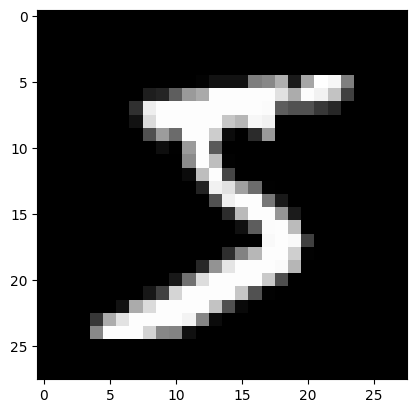

In [11]:
#  display the first image
import matplotlib.pyplot as plt
print(y_train[0])
plt.imshow(x_train[0], cmap='gray')
plt.show()

### Normalize data from higher value into [0,1]

In [8]:
x_train, x_test = x_train / 255.0, x_test / 255.0

### Categorized Y

In [12]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [13]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
### Reshape the data

In [19]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

In [18]:
print(x_train.shape)

(60000, 28, 28, 1)


##  [LeNet Architecture](https://en.wikipedia.org/wiki/LeNet)

In [21]:
model_lenet = tf.keras.models.Sequential([

    # Convolutional layer 1 with 6 filters of size 5x5
    tf.keras.layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1), padding='same'),

    # Pool layer 1 with a 2x2 filter and stride 2x2
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),

    # Convolutional layer 2 with 16 filters of size 5x5
    tf.keras.layers.Conv2D(16, (5, 5), activation='relu', padding='valid'),

    # Pool layer 2 with a 2x2 filter and stride 2x2
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),

    # Flatten the output of the previous layer
    tf.keras.layers.Flatten(),

    # Fully connected layer 1 with 120 units
    tf.keras.layers.Dense(120, activation='relu'),

    # Fully connected layer 2 with 84 units
    tf.keras.layers.Dense(84, activation='relu'),

    # Output layer with 10 units
    tf.keras.layers.Dense(10, activation='softmax')
])

In [22]:
# Train neural network
model_lenet.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
model_lenet.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 21s 10ms/step - loss: 0.2178 - accuracy: 0.9343
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0703 - accuracy: 0.9781
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0503 - accuracy: 0.9843
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0396 - accuracy: 0.9871
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0319 - accuracy: 0.9894
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0255 - accuracy: 0.9915
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0229 - accuracy: 0.9926
Epoch 8/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0199 - accuracy: 0.9937
Epoch 9/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0174 - accuracy: 0.9943
Epoch 10/10
1875/1875 [==============================] - 20s 11m

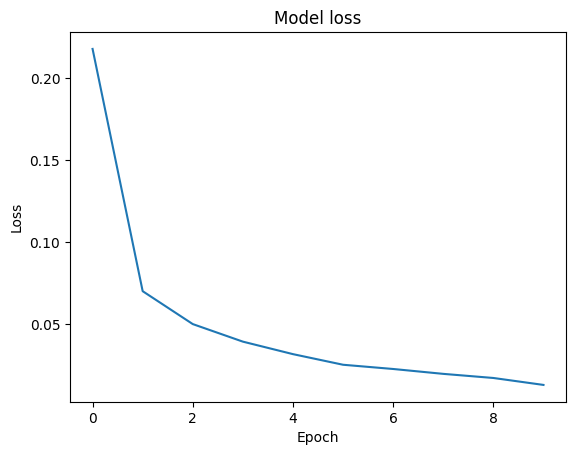

In [23]:
# Display the loss graph
plt.plot(model_lenet.history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [24]:
model_lenet.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0278 - accuracy: 0.9909


[0.027756426483392715, 0.9908999800682068]

### Save the model

In [25]:
model_lenet.save('lenet.h5')

/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
